# Дипломная работа

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

from scipy.optimize import minimize
%matplotlib inline

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from sympy import *
from scipy.misc import derivative

import scipy
import sklearn

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# Ищем наиболее подходящего пользователя

def cosinus(x, y):
    xLength = np.linalg.norm( x )
    yLength = np.linalg.norm( y )
    
    return np.dot(x,y) / ( xLength * yLength)

In [4]:
for i in range(len(raitings)):
    sim = 0
    for j in range(len(raitings)):
        if i == j:
            continue
            
        x = raitings[i]
        y = raitings[j]
        cos = cosinus(x, y)
            
        if cos > sim:
            sim = cos
            usr = j + 1
            
    print('Пользователь', i+1, 'похож на пользователя', usr)

Пользователь 1 похож на пользователя 9
Пользователь 2 похож на пользователя 5
Пользователь 3 похож на пользователя 10
Пользователь 4 похож на пользователя 10
Пользователь 5 похож на пользователя 9
Пользователь 6 похож на пользователя 10
Пользователь 7 похож на пользователя 4
Пользователь 8 похож на пользователя 6
Пользователь 9 похож на пользователя 1
Пользователь 10 похож на пользователя 3


In [6]:
for i in range(len(raitings)):
    sim = 0
    for j in range(len(raitings)):
        while i != j:
            continue
            
        x = raitings[i]
        y = raitings[j]
        cos = scipy.spatial.distance.correlation([i], [j])
        pairwise_distances([[i], [j]], metric='correlation')
    
        if cos > sim:
            sim = cos
            usr = j + 1
            
    print('Пользователь', i+1, 'похож на пользователя', usr)

NameError: name 'pairwise_distances' is not defined

In [7]:
# Сжать с 15 фильмов до 5-ти признаков SVD-метод

zip_ = TruncatedSVD(n_components = 5)
zipped = zip_.fit_transform(raitings)

print(zipped)

[[23.41982063 -5.36092136  3.83196779 -4.06950174  1.10267269]
 [24.76774917  4.52188701  1.35815965  1.58128545  8.59912002]
 [22.27728589 -6.96492049 -4.84461485 -0.47661647  3.37152266]
 [19.4257757   2.64575227 -6.86014009 -4.76604765  1.96075707]
 [22.8146354   0.51464093  7.70180188  4.42379773  1.29124163]
 [21.76961656  1.94294987 -4.56934779  8.32306487 -2.21887359]
 [21.23427453  9.78047778  1.16340271 -4.86074521 -2.60815471]
 [19.97476815  4.00048677 -1.67456316  1.1512346  -3.5637169 ]
 [26.39306998 -3.03090482  5.86422753 -1.67503491 -3.71500141]
 [29.94016844 -4.82012297 -3.48912415  0.05527083 -3.62526487]]


In [8]:
# Сжать с 15 фильмов до 5-ти признаков PCA-метод

pca = PCA(n_components = 5)
new = pca.fit_transform(raitings)

print(new)

[[-5.30986101  1.92919845 -4.93300027  2.70188013  5.50497886]
 [ 2.87763403  2.71659559  1.40592782  7.26325751 -4.50322291]
 [-4.94010408 -6.68861167 -0.94550184  3.61556661 -0.68969272]
 [ 5.14939908 -6.28027284 -4.65978558  1.09024004 -1.01471112]
 [-1.37488691  7.54357985  4.00834369  2.1284001  -0.16324949]
 [ 2.65341956 -3.77075601  8.58430748 -1.46628319  1.67401769]
 [ 8.61573944  3.78603335 -4.02721027 -4.37582577 -3.13880277]
 [ 5.39658258 -1.0170466   1.01456742 -1.89512837  6.54883538]
 [-5.7843488   5.29857107 -1.48083611 -3.71295542  0.21312695]
 [-7.2835739  -3.51729118  1.03318766 -5.34915166 -4.43127987]]


## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [12]:
x = Symbol('x')
y = (tan(sin(x)+cos(2*x+3)))**2
result = y.diff(x)

result

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [13]:
def f1(x):
    return (tan(sin(x)+cos(2*x+3)))**2

result = derivative(f1, 1, dx = 1e-6)

print(result)

55.3859176433136


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [14]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [15]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [16]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

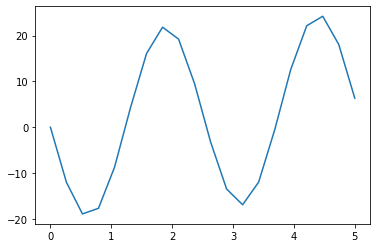

In [17]:
plt.plot(x, fx)
plt.show()

In [18]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [19]:
# Решение задачи

params = [2,55]
result = minimize(error, params)

print('a =', result.x[0])
print('b =', result.x[1])

a = 1.2414859341469637
b = 54.11441775796914


## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [26]:
rand = np.random.randint(low=1, high=20, size=20)

total = np.array([])
mean = []

for i in range(1000):
    new = np.random.choice(rand, 50)
    total = np.concatenate((total, new), axis = None)
#Посчитайте среднее для каждой выборки
    mean.append(new.mean())
#     print(new_array)
print(total)
print(mean[0:15])

[17. 17.  8. ...  4. 16. 10.]
[10.84, 11.44, 9.66, 10.92, 10.92, 10.14, 9.7, 11.06, 10.86, 11.26, 12.86, 12.1, 10.52, 11.14, 11.9]


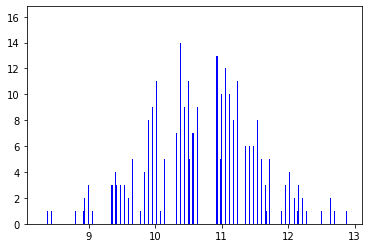

In [27]:
#Постройте гистограмму распределения средних

plt.hist(mean, 1000, color='b')
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [29]:
matrix = np.array([[1, 4], [1, 1]])
print(matrix)

[[1 4]
 [1 1]]


In [31]:
a, b = np.linalg.eig(matrix)

for i in range(len(a)):
    print(str(a[i]))
    print(str(b[:,i]))

3.0000000000000004
[0.89442719 0.4472136 ]
-0.9999999999999996
[-0.89442719  0.4472136 ]
